Task 0: Classification of Fashion-MNIST images


# Load Data

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as nnF
from torch.utils.data import DataLoader as torch_dataloader
from torch.utils.data import Dataset as torch_dataset
import torch.optim as optim
import seaborn as sns

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=0)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=0)
print("train:", x_train.shape, y_train.shape)
print("val:", x_val.shape, y_val.shape)
print("test:", x_test.shape, y_test.shape)
x_train_copy = x_train.copy()
x_val_copy = x_val.copy()
x_test_copy = x_test.copy()

train: (48600, 28, 28) (48600,)
val: (5400, 28, 28) (5400,)
test: (10000, 28, 28) (10000,)


In [ ]:
dim = 28 * 28
x_train = x_train.reshape(x_train.shape[0], dim)
x_val = x_val.reshape(x_val.shape[0],dim)
x_test = x_test.reshape(x_test.shape[0],dim)
print("train:", x_train.shape, y_train.shape)
print("val:", x_val.shape, y_val.shape)
print("test:", x_test.shape, y_test.shape)
print(x_train_copy.shape)

train: (48600, 784) (48600,)
val: (5400, 784) (5400,)
test: (10000, 784) (10000,)
(48600, 28, 28)


<Figure size 640x480 with 0 Axes>

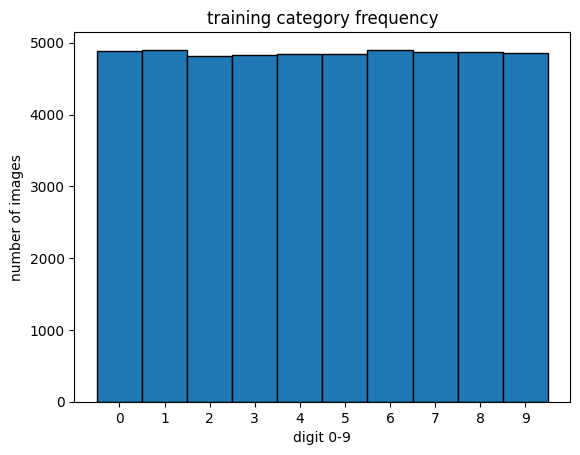

<Figure size 640x480 with 0 Axes>

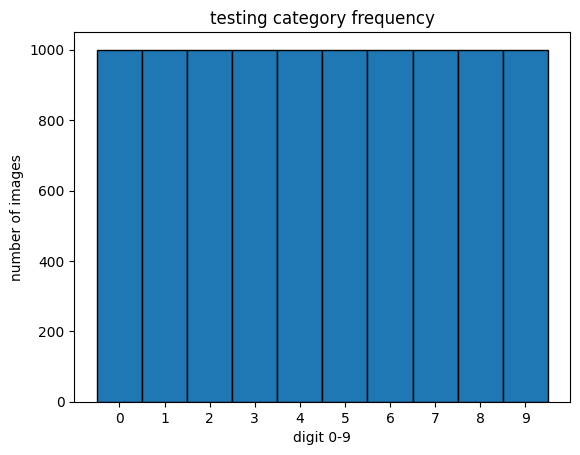

In [ ]:
def display_hist(data, type):
  plt.figure()
  fig, ax = plt.subplots()
  ax.bar(range(10), data, width=1, align='center', edgecolor='black')
  ax.set(xticks=range(10), xlim=[-1, 10])
  plt.ylabel("number of images")
  plt.xlabel("digit 0-9")
  plt.title(type + "ing category frequency")
  plt.show()


train_frequency = []
for i in range(10):
  train_frequency.append(len(x_train[y_train==i]))

display_hist(train_frequency, "train")

test_frequency = []
for i in range(10):
  test_frequency.append(len(x_test[y_test==i]))

display_hist(test_frequency, "test")

No class imbalance -> No need to use weighted accuracy

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)

print("Validation accuracy:", lr.score(x_val, y_val))
print("Testing accuracy:", lr.score(x_test, y_test))

Validation accuracy: 0.8568518518518519
Testing accuracy: 0.8406


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
forest = RandomForestClassifier(n_estimators=50, max_depth=20, random_state=0)
forest.fit(x_train, y_train)

y_val_pred = forest.predict(x_val)
y_test_pred = forest.predict(x_test)

print("Validation accuracy:", accuracy_score(y_val, y_val_pred))
print("Testing accuracy:", accuracy_score(y_test, y_test_pred))

Validation accuracy: 0.8796296296296297
Testing accuracy: 0.8707


## Hyperparameter Optimization: max_depth

In [ ]:
max_depth_list = np.arange(1,21)
max_depth_list

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [ ]:
acc_train_list = []
acc_val_list = []

for max_depth in max_depth_list:
    forest = RandomForestClassifier(n_estimators=50, max_depth=max_depth, random_state=0)
    forest.fit(x_train, y_train)
    
    y_train_pred = forest.predict(x_train)
    acc_train_list.append(accuracy_score(y_train, y_train_pred))
    
    y_val_pred = forest.predict(x_val)
    acc_val_list.append(accuracy_score(y_val, y_val_pred))
    
print(acc_train_list)
print(acc_val_list)

[0.3420164609053498, 0.574917695473251, 0.6939300411522634, 0.7454526748971193, 0.7687242798353909, 0.8001851851851852, 0.8223456790123457, 0.8410905349794239, 0.8636008230452675, 0.8844444444444445, 0.9031687242798354, 0.9205349794238683, 0.9389711934156378, 0.9544444444444444, 0.9667695473251029, 0.9766255144032921, 0.9826131687242798, 0.9881893004115226, 0.9914609053497943, 0.9939300411522634]
[0.3453703703703704, 0.5711111111111111, 0.6892592592592592, 0.7518518518518519, 0.7707407407407407, 0.8055555555555556, 0.817962962962963, 0.8366666666666667, 0.8474074074074074, 0.8561111111111112, 0.865, 0.8716666666666667, 0.8709259259259259, 0.8775925925925926, 0.8755555555555555, 0.8809259259259259, 0.8824074074074074, 0.8816666666666667, 0.8807407407407407, 0.8796296296296297]


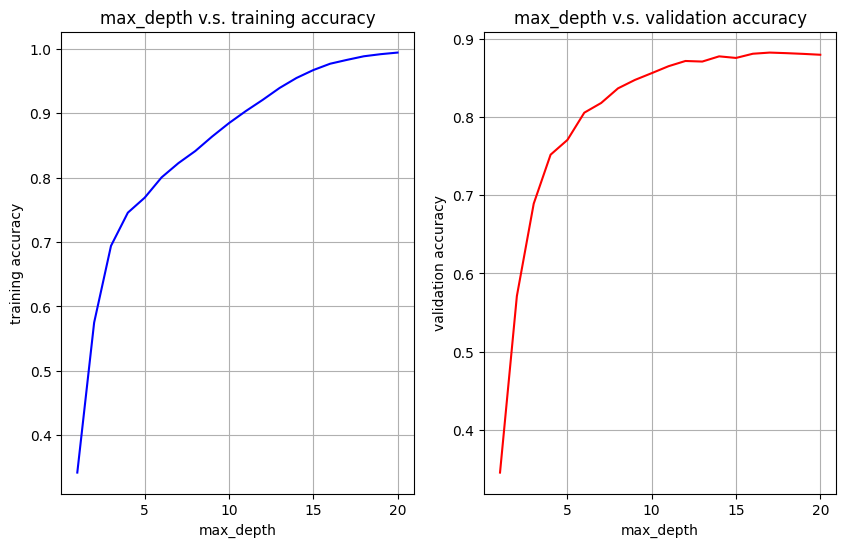

In [ ]:
#plot max_depth vs acc_train using max_depth_list and acc_train_list
#plot max_depth vs acc_val using max_depth_list and acc_val_list
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].plot(max_depth_list, acc_train_list, 'b')
ax[0].set_xlabel('max_depth')
ax[0].set_ylabel('training accuracy')
ax[0].set_title('max_depth v.s. training accuracy')
ax[0].grid(True)
ax[1].plot(max_depth_list, acc_val_list, 'r')
ax[1].set_xlabel('max_depth')
ax[1].set_ylabel('validation accuracy')
ax[1].set_title('max_depth v.s. validation accuracy')
ax[1].grid(True)

In [ ]:
max_depth_best = max_depth_list[np.argmax(np.array(acc_train_list))]
max_depth_best

20

In [ ]:
best_forest = RandomForestClassifier(n_estimators=50, max_depth=max_depth_best, random_state=0)
best_forest.fit(x_train, y_train)

y_test_pred = best_forest.predict(x_test)

print('Testing accuracy for the best model: ', accuracy_score(y_test, y_test_pred))

Testing accuracy for the best model:  0.8707


# MLP

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=784, out_features=512)
        self.linear2 = nn.Linear(512, 256)
        self.avg1 = nn.AvgPool1d(kernel_size=2, stride=2)
        
        self.norm3 = nn.BatchNorm1d(256)
        self.linear3 = nn.Linear(256, 128)
        self.avg2 = nn.AvgPool1d(kernel_size=2, stride=2)

        self.norm4 = nn.BatchNorm1d(128)
        self.linear4 = nn.Linear(128, 32)

        self.linear5 = nn.Linear(32, 10)

    def forward(self, x):
        x = nnF.relu(self.linear1(x))
        x1 = nnF.relu(self.linear2(x))
        x2 = self.avg1(x)
        x = x1 + x2

        x1 = self.norm3(x)
        x2 = nnF.relu(self.linear3(x1))
        x3 = self.avg2(x)
        x = x2 + x3
        
        x = self.norm4(x)
        x = nnF.relu(self.linear4(x))

        z = self.linear5(x)

        return z

In [ ]:
def save_checkpoint(filename, model, optimizer, result, epoch):
    torch.save({'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'result':result},
               filename)
    print('saved:', filename)

In [ ]:
def cal_accuracy(confusion):
    #input: confusion is the confusion matrix
    #output: acc is the standard classification accuracy
    M=confusion.copy().astype('float32')
    acc = M.diagonal().sum()/M.sum()    
    sens=np.zeros(M.shape[0])
    prec=np.zeros(M.shape[0]) 
    for n in range(0, M.shape[0]):
        TP=M[n,n]
        FN=np.sum(M[n,:])-TP
        FP=np.sum(M[:,n])-TP
        sens[n]=TP/(TP+FN)
        prec[n]=TP/(TP+FP)       
    return acc, sens, prec

In [ ]:
def train(model, device, optimizer, dataloader, epoch):    
    model.train() #set model to training mode
    loss_train=0
    acc_train =0 
    sample_count=0
    for batch_idx, (X, Y) in enumerate(dataloader):
        X, Y = X.to(device), Y.to(device)
        optimizer.zero_grad() #clear grad of each parameter
        Z = model(X) #forward pass
        loss = nnF.cross_entropy(Z, Y)
        loss.backward() #backward pass
        optimizer.step() #update parameters
        loss_train+=loss.item()
        #do not need softmax
        Yp = Z.data.max(dim=1)[1]  #get the index of the max               
        acc_train+= torch.sum(Yp==Y).item()
        sample_count+=X.size(0)
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{:.0f}%]\tLoss: {:.6f}'.format(
                    epoch, 100. * batch_idx / len(dataloader), loss.item()))
    loss_train/=len(dataloader)
    acc_train/=sample_count    
    return loss_train, acc_train

In [ ]:
def test(model, device, dataloader):
    model.eval() #set model to evaluation mode
    acc_test =0
    confusion=np.zeros((10,10))
    with torch.no_grad(): #tell Pytorch not to build graph in the with section
        for batch_idx, (X, Y) in enumerate(dataloader):
            X, Y = X.to(device), Y.to(device)
            Z = model(X) #forward pass
            #do not need softmax
            Yp = Z.data.max(dim=1)[1]  #get the index of the max 
            acc_test+= torch.sum(Yp==Y).item()
            for i in range(0, 10):
                for j in range(0, 10):
                    confusion[i,j]+=torch.sum((Y==i)&(Yp==j)).item()
    acc, sens, prec=cal_accuracy(confusion)
    return acc, (confusion, sens, prec)

In [ ]:
class MyDataset(torch_dataset):
    def __init__(self, X, Y):
        self.X=X
        self.Y=Y
    def __len__(self):
        #return the number of data points
        return self.X.shape[0]
    def __getitem__(self, idx):        
        #we can use DatasetName[idx] to get a data point (x,y) with index idx
        x=torch.tensor(self.X[idx], dtype=torch.float32)
        y=torch.tensor(self.Y[idx], dtype=torch.int64)
        #x=x.reshape(1,-1) if network is CNN
        return x, y

In [ ]:
dataset_train = MyDataset(x_train, y_train)
dataset_val = MyDataset(x_val, y_val)
dataset_test = MyDataset(x_test, y_test)

In [ ]:
loader_train = torch_dataloader(dataset_train, batch_size=1000, shuffle=True, num_workers=0)
loader_val = torch_dataloader(dataset_val, batch_size=1000, shuffle=False, num_workers=0) 
loader_test = torch_dataloader(dataset_test, batch_size=1000, shuffle=False, num_workers=0) 

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model= MLP()
model.to(device)
x = torch.cat((dataset_train[0][0], dataset_train[1][0]))
print(x.shape)
x = x.view(2,784).to(device) #change it to x=x.view(1,1,187).to(device) for CNN

z = model(x)

torch.Size([1568])


In [ ]:
y_hat=nnF.softmax(z, dim=1)
y_hat

tensor([[0.0799, 0.1080, 0.1086, 0.0951, 0.0696, 0.1049, 0.1049, 0.1045, 0.1045,
         0.1201],
        [0.0587, 0.1278, 0.1373, 0.1036, 0.0756, 0.0723, 0.0921, 0.0772, 0.1521,
         0.1032]], grad_fn=<SoftmaxBackward0>)

## Hyperparameter Optimization: Learning Rate

In [ ]:
learning_rates = np.arange(0.0, 0.021, 0.001)
optimizers = []
for lr in learning_rates:
  optimizers.append(optim.Adamax(model.parameters(), lr=lr, weight_decay=1e-4))

In [ ]:
loss_train_list=[]
acc_train_list=[]
acc_val_list=[]
epoch_save=-1

In [ ]:
i = 0
epoch = 50
for optimizer in optimizers: 
    learning_rate = round(learning_rates[i], 3)
    #-------- training --------------------------------
    loss_train, acc_train =train(model, device, optimizer, loader_train, epoch)    
    loss_train_list.append(loss_train)
    acc_train_list.append(acc_train)
    print('learning_rate', learning_rate, 'training loss:', loss_train, 'acc:', acc_train)
    #-------- validation --------------------------------
    acc_val, other_val = test(model, device, loader_val)
    acc_val_list.append(acc_val)
    print('learning_rate', learning_rate, 'validation acc:', acc_val)
    #--------save model-------------------------
    result = (loss_train_list, acc_train_list, 
              acc_val_list, other_val)
    save_checkpoint('ECG_MLP_Pytorch_learning_rate'+str(learning_rate)+'.pt', model, optimizer, result, epoch)
    i += 1

Train Epoch: 50 [0%]	Loss: 2.319803
learning_rate 0.0 training loss: 2.3241709300449918 acc: 0.06975308641975309


<ipython-input-8-dfed762f0642>:13: RuntimeWarning: invalid value encountered in float_scalars
  prec[n]=TP/(TP+FP)


learning_rate 0.0 validation acc: 0.07074074
saved: ECG_MLP_Pytorch_learning_rate0.0.pt
Train Epoch: 50 [0%]	Loss: 2.319850
learning_rate 0.001 training loss: 1.009102081765934 acc: 0.7522633744855967
learning_rate 0.001 validation acc: 0.83037037
saved: ECG_MLP_Pytorch_learning_rate0.001.pt
Train Epoch: 50 [0%]	Loss: 0.679083
learning_rate 0.002 training loss: 0.4868080451780436 acc: 0.8388271604938271
learning_rate 0.002 validation acc: 0.8659259
saved: ECG_MLP_Pytorch_learning_rate0.002.pt
Train Epoch: 50 [0%]	Loss: 0.369817
learning_rate 0.003 training loss: 0.4500860048800099 acc: 0.8413991769547325
learning_rate 0.003 validation acc: 0.86444443
saved: ECG_MLP_Pytorch_learning_rate0.003.pt
Train Epoch: 50 [0%]	Loss: 0.322985
learning_rate 0.004 training loss: 0.41395304458481924 acc: 0.8511934156378601
learning_rate 0.004 validation acc: 0.8687037
saved: ECG_MLP_Pytorch_learning_rate0.004.pt
Train Epoch: 50 [0%]	Loss: 0.331272
learning_rate 0.005 training loss: 0.4224944187670338 

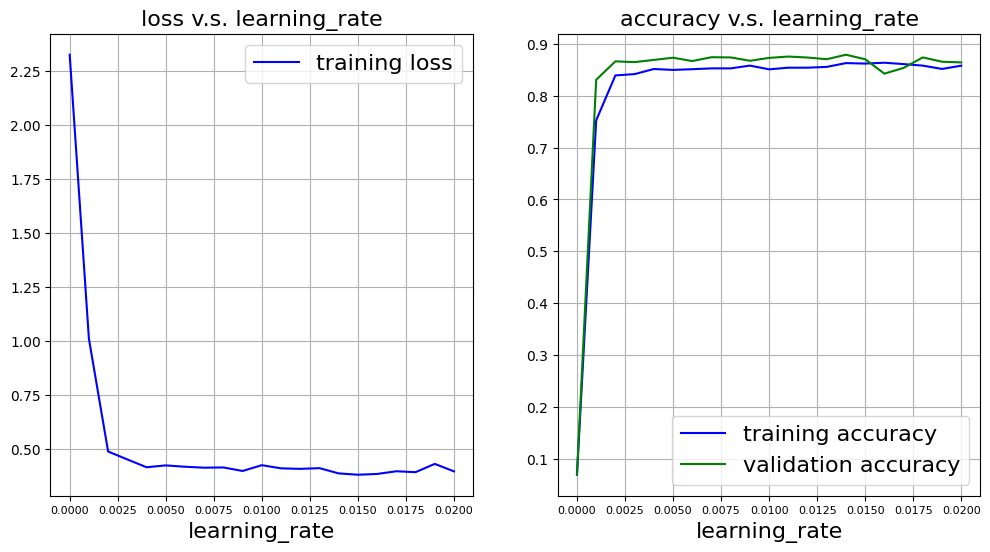

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].tick_params(axis='x', which='major', labelsize=8)
ax[1].tick_params(axis='x', which='major', labelsize=8)
ax[0].set_title('loss v.s. learning_rate',fontsize=16)
ax[0].plot(learning_rates, loss_train_list, '-b', label='training loss')
ax[0].set_xlabel('learning_rate',fontsize=16)
ax[0].legend(fontsize=16)
ax[0].grid(True)
ax[1].set_title('accuracy v.s. learning_rate',fontsize=16)
ax[1].plot(learning_rates, acc_train_list, '-b', label='training accuracy')
ax[1].plot(learning_rates, acc_val_list, '-g', label='validation accuracy')
ax[1].set_xlabel('learning_rate',fontsize=16)
ax[1].legend(fontsize=16)
ax[1].grid(True)

In [ ]:
best_learning_rate=np.argmax(acc_val_list)
best_learning_rate = learning_rates[best_learning_rate]
print(best_learning_rate)

0.014


In [ ]:
checkpoint=torch.load('ECG_MLP_Pytorch_learning_rate'+str(round(best_learning_rate, 3))+'.pt')
model= MLP()
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device);
model.eval();

In [ ]:
acc, (confusion, sens, prec) = test(model, device, loader_test)
print('Accuracy', acc)
print('Sensitivity', sens)
print('Precision', prec)
print('Confusion \n', confusion)

Accuracy 0.864
Sensitivity [0.80199999 0.96700001 0.77200001 0.917      0.77399999 0.93400002
 0.616      0.97899997 0.96700001 0.912     ]
Precision [0.8328141  0.97676766 0.7689243  0.80579966 0.77091634 0.9638803
 0.69447577 0.88277727 0.96410769 0.97749197]
Confusion 
 [[802.   5.  10.  49.   1.   3. 121.   0.   9.   0.]
 [  4. 967.   0.  21.   4.   0.   2.   0.   2.   0.]
 [ 18.   0. 772.  26. 113.   0.  68.   0.   3.   0.]
 [ 17.  15.   3. 917.  19.   0.  25.   0.   4.   0.]
 [  0.   1. 115.  59. 774.   0.  49.   0.   2.   0.]
 [  0.   0.   0.   0.   0. 934.   0.  51.   2.  13.]
 [119.   2. 100.  60.  89.   0. 616.   0.  14.   0.]
 [  0.   0.   0.   0.   0.  13.   0. 979.   0.   8.]
 [  3.   0.   4.   6.   4.   4.   5.   7. 967.   0.]
 [  0.   0.   0.   0.   0.  15.   1.  72.   0. 912.]]


# 2D CNN

In [ ]:
x_train = x_train_copy
x_val = x_val_copy
x_test = x_test_copy
print("train:", x_train.shape, y_train.shape)
print("val:", x_val.shape, y_val.shape)
print("test:", x_test.shape, y_test.shape)

train: (48600, 28, 28) (48600,)
val: (5400, 28, 28) (5400,)
test: (10000, 28, 28) (10000,)


Resize images from 28x28 to 32x32

In [ ]:
from skimage.transform import resize
x_train_resized=np.zeros((x_train.shape[0],32,32), dtype=np.float32)
for n in range(0, x_train.shape[0]):
    x = x_train[n,:,:]
    x = resize(x, [32, 32], mode='edge')
    x_train_resized[n,:,:]=x
x_val_resized=np.zeros((x_val.shape[0],32,32), dtype=np.float32)
for n in range(0, x_val.shape[0]):
    x = x_val[n,:,:]
    x = resize(x, [32, 32], mode='edge')
    x_val_resized[n,:,:]=x
x_test_resized=np.zeros((x_test.shape[0],32,32), dtype=np.float32)
for n in range(0, x_test.shape[0]):
    x = x_test[n,:,:]
    x = resize(x, [32, 32], mode='edge')
    x_test_resized[n,:,:]=x
x_train=x_train_resized
x_val=x_val_resized
x_test=x_test_resized

In [ ]:
print("train:", x_train.shape, y_train.shape)
print("val:", x_val.shape, y_val.shape)
print("test:", x_test.shape, y_test.shape)

train: (48600, 32, 32) (48600,)
val: (5400, 32, 32) (5400,)
test: (10000, 32, 32) (10000,)


Reshape every data point

In [ ]:
x_train=x_train.reshape(-1,1,32,32).astype('float32')
x_val=x_val.reshape(-1,1,32,32).astype('float32')
x_test=x_test.reshape(-1,1,32,32).astype('float32')

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, 
                               out_channels=6, 
                               kernel_size=(5,5),
                               stride=1, padding=0, dilation=1, groups=1, bias=True)
        self.pool1 = nn.MaxPool2d(kernel_size=(2, 2), stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=(5, 5))        
        self.pool2 = nn.MaxPool2d(kernel_size=(2, 2), stride=2)
        self.conv3 = nn.Conv2d(16, 120, kernel_size=(5, 5))        
        self.fc1 = nn.Linear(120, 84)
        self.fc2 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool1(nnF.relu(self.conv1(x)))
        x = self.pool2(nnF.relu(self.conv2(x)))
        x = nnF.relu(self.conv3(x))
        x = x.view(x.size(0), -1)
        x = nnF.relu(self.fc1(x))
        z = self.fc2(x)
        ##y=nnF.softmax(z,dim=1)
        return z        

In [ ]:
def trainCNN(model, optimizer, dataloader, device, epoch):    
    model.train()#set model to training mode
    loss_train=0
    acc_train =0 
    for batch_idx, (X, Y) in enumerate(dataloader):
        X, Y = X.to(device), Y.to(device)
        optimizer.zero_grad()#clear grad of each parameter, set dL/dw=0 
        Z = model(X)#forward pass
        loss = nnF.cross_entropy(Z, Y)
        loss.backward()#backward pass  to compute dL/dw
        optimizer.step()#update parameters  w = w - lr*dL/dw
        loss_train+=loss.item()
        #do not need softmax
        Yp = Z.data.max(dim=1)[1]  # get the index of the max               
        acc_train+= torch.sum(Yp==Y).item()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{:.0f}%]\tLoss: {:.6f}'.format(
                    epoch, 100. * batch_idx / len(dataloader), loss.item()))
    loss_train/=len(dataloader)
    acc_train/=len(dataloader.dataset) 
    return loss_train, acc_train

In [ ]:
class MyDatasetCNN(torch_dataset):
    def __init__(self, X, Y):
        self.X=X
        self.Y=Y
    def __len__(self):
        #return the number of data points
        return self.X.shape[0]
    def __getitem__(self, idx):        
        #we can use DatasetName[idx] to get a data point (x,y) with index idx
        x=torch.tensor(self.X[idx], dtype=torch.float32)
        y=torch.tensor(self.Y[idx], dtype=torch.int64)
        return x, y

In [ ]:
dataset_train = MyDatasetCNN(x_train, y_train)
dataset_val = MyDatasetCNN(x_val, y_val)
dataset_test = MyDatasetCNN(x_test, y_test)

In [ ]:
loader_train = torch_dataloader(dataset_train, batch_size=1000, shuffle=True, num_workers=0)
loader_val = torch_dataloader(dataset_val, batch_size=1000, shuffle=False, num_workers=0) 
loader_test = torch_dataloader(dataset_test, batch_size=1000, shuffle=False, num_workers=0) 

In [ ]:
for epoch in range(0, 1): # change 1 to 100 if we need to train the model for 100 epochs
    for batch_idx, (X, Y) in enumerate(loader_train):
        # X contain the data samples in a mini-batch
        # Y contain the class lables of these samples
        print(batch_idx, X.size(), Y.size())

0 torch.Size([1000, 1, 32, 32]) torch.Size([1000])
1 torch.Size([1000, 1, 32, 32]) torch.Size([1000])
2 torch.Size([1000, 1, 32, 32]) torch.Size([1000])
3 torch.Size([1000, 1, 32, 32]) torch.Size([1000])
4 torch.Size([1000, 1, 32, 32]) torch.Size([1000])
5 torch.Size([1000, 1, 32, 32]) torch.Size([1000])
6 torch.Size([1000, 1, 32, 32]) torch.Size([1000])
7 torch.Size([1000, 1, 32, 32]) torch.Size([1000])
8 torch.Size([1000, 1, 32, 32]) torch.Size([1000])
9 torch.Size([1000, 1, 32, 32]) torch.Size([1000])
10 torch.Size([1000, 1, 32, 32]) torch.Size([1000])
11 torch.Size([1000, 1, 32, 32]) torch.Size([1000])
12 torch.Size([1000, 1, 32, 32]) torch.Size([1000])
13 torch.Size([1000, 1, 32, 32]) torch.Size([1000])
14 torch.Size([1000, 1, 32, 32]) torch.Size([1000])
15 torch.Size([1000, 1, 32, 32]) torch.Size([1000])
16 torch.Size([1000, 1, 32, 32]) torch.Size([1000])
17 torch.Size([1000, 1, 32, 32]) torch.Size([1000])
18 torch.Size([1000, 1, 32, 32]) torch.Size([1000])
19 torch.Size([1000, 1

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model=CNN()
model.to(device)
x=dataset_train[0][0]
x=x.view(1,1,32,32).to(device) #change it to x=x.view(1,1,187).to(device) for CNN
z=model(x)

In [ ]:
y_hat=nnF.softmax(z, dim=1)
y_hat

tensor([[0.1025, 0.1051, 0.0968, 0.0914, 0.1082, 0.0983, 0.1065, 0.0977, 0.1022,
         0.0911]], grad_fn=<SoftmaxBackward0>)

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
len(loader_train)

49

train/val/test over many epochs

In [ ]:
loss_train_list=[]
acc_train_list=[]
acc_val_list=[]
epoch_save=-1

## Hyperparameter Optimization: Number of Training Epochs

In [ ]:
for epoch in range(epoch_save+1, 100): #change 100 to a larger number if necessary
    #-------- training --------------------------------
    loss_train, acc_train = trainCNN(model, optimizer, loader_train, device, epoch)    
    loss_train_list.append(loss_train)
    acc_train_list.append(acc_train)
    print('epoch', epoch, 'training loss:', loss_train, 'acc:', acc_train)
    #-------- validation --------------------------------
    acc_val, other_val = test(model, device, loader_val)
    acc_val_list.append(acc_val)
    print('epoch', epoch, 'validation acc:', acc_val)
    #--------save model-------------------------
    result = (loss_train_list, acc_train_list, 
              acc_val_list, other_val)
    save_checkpoint('ECG_MLP_Pytorch_epoch'+str(epoch)+'.pt', model, optimizer, result, epoch)
    epoch_save=epoch

Train Epoch: 49 [0%]	Loss: 0.665199
epoch 49 training loss: 0.6448491337348004 acc: 0.7560288065843621
epoch 49 validation acc: 0.765
saved: ECG_MLP_Pytorch_epoch49.pt
Train Epoch: 50 [0%]	Loss: 0.599612
epoch 50 training loss: 0.6410891912421401 acc: 0.7555555555555555
epoch 50 validation acc: 0.7690741
saved: ECG_MLP_Pytorch_epoch50.pt
Train Epoch: 51 [0%]	Loss: 0.654570
epoch 51 training loss: 0.6353434214786607 acc: 0.7592592592592593
epoch 51 validation acc: 0.75555557
saved: ECG_MLP_Pytorch_epoch51.pt
Train Epoch: 52 [0%]	Loss: 0.673919
epoch 52 training loss: 0.6435874992487381 acc: 0.7538271604938271
epoch 52 validation acc: 0.7612963
saved: ECG_MLP_Pytorch_epoch52.pt
Train Epoch: 53 [0%]	Loss: 0.671834
epoch 53 training loss: 0.6309019497462681 acc: 0.7603703703703704
epoch 53 validation acc: 0.7688889
saved: ECG_MLP_Pytorch_epoch53.pt
Train Epoch: 54 [0%]	Loss: 0.575340
epoch 54 training loss: 0.634940183892542 acc: 0.7581893004115227
epoch 54 validation acc: 0.76592594
saved

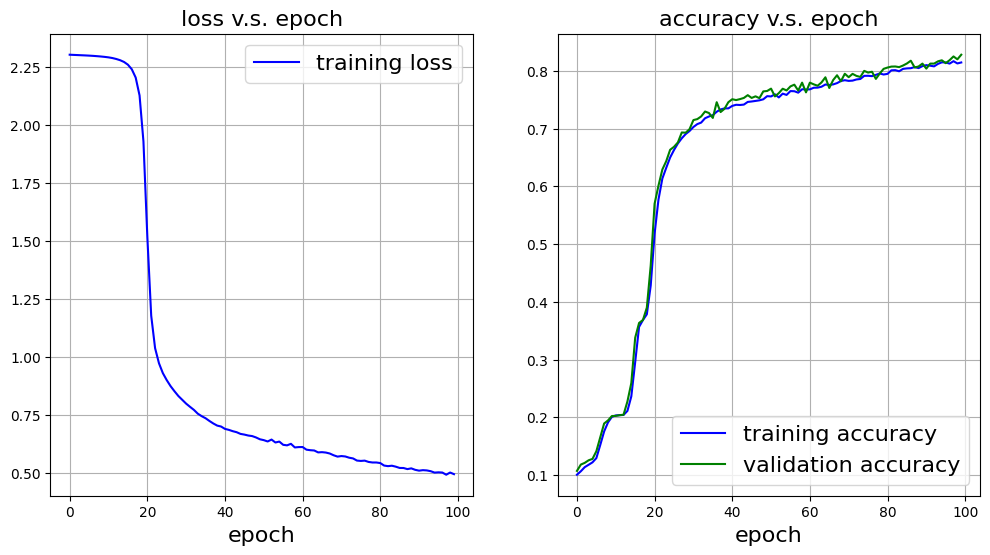

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].set_title('loss v.s. epoch',fontsize=16)
ax[0].plot(loss_train_list, '-b', label='training loss')
ax[0].set_xlabel('epoch',fontsize=16)
ax[0].legend(fontsize=16)
ax[0].grid(True)
ax[1].set_title('accuracy v.s. epoch',fontsize=16)
ax[1].plot(acc_train_list, '-b', label='training accuracy')
ax[1].plot(acc_val_list, '-g', label='validation accuracy')
ax[1].set_xlabel('epoch',fontsize=16)
ax[1].legend(fontsize=16)
ax[1].grid(True)

Load the best model

In [ ]:
best_epoch=np.argmax(acc_val_list)
best_epoch

99

In [ ]:
acc, (confusion, sens, prec) = test(model, device, loader_test)
print('Accuracy', acc)
print('Sensitivity', sens)
print('Precision', prec)
print('Confusion \n', confusion)

Accuracy 0.8103
Sensitivity [0.79699999 0.93800002 0.65600002 0.85500002 0.63200003 0.91399997
 0.49700001 0.91799998 0.94099998 0.95499998]
Precision [0.78677195 0.9710145  0.6194523  0.80131209 0.7125141  0.95307612
 0.50405681 0.90891087 0.9280079  0.91915303]
Confusion 
 [[797.   3.  23.  64.   4.   3.  91.   0.  15.   0.]
 [  2. 938.   9.  43.   3.   0.   4.   0.   1.   0.]
 [ 12.   2. 656.  12. 127.   0. 177.   0.  14.   0.]
 [ 21.  18.  18. 855.  30.   1.  50.   0.   7.   0.]
 [  1.   2. 173.  41. 632.   2. 143.   0.   6.   0.]
 [  0.   0.   0.   1.   0. 914.   0.  53.   4.  28.]
 [175.   1. 170.  44.  87.   0. 497.   0.  26.   0.]
 [  0.   0.   0.   0.   0.  28.   0. 918.   0.  54.]
 [  5.   2.   9.   7.   4.   2.  24.   4. 941.   2.]
 [  0.   0.   1.   0.   0.   9.   0.  35.   0. 955.]]


The best model is Random Forest